# Яндекс Музыка

Сравнение Москвы и Петербурга окружено мифами. Например:
 * Москва — мегаполис, подчинённый жёсткому ритму рабочей недели;
 * Петербург — культурная столица, со своими вкусами.

На данных Яндекс Музыки мы хотим сравнить поведение пользователей двух столиц.

**Цель исследования** — проверим три гипотезы:
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.

**Ход исследования**

Данные о поведении пользователей получим из файла `yandex_music_project.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез произведем обзор данных.

Мы проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки мы поищем возможность исправить самые критичные ошибки данных.

Таким образом, исследование проведем в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотез.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Проведем обзор данных

Загрузим данные и посмотрим первые 10 строк

In [2]:
df = pd.read_csv('data/yandex_music_project.csv')
df.head()

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday


Получим общую информацию о таблице

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


Итак, в таблице семь столбцов. Тип данных во всех столбцах — `object`.

Согласно документации к данным:
* `userID` — идентификатор пользователя;
* `Track` — название трека;  
* `artist` — имя исполнителя;
* `genre` — название жанра;
* `City` — город пользователя;
* `time` — время начала прослушивания;
* `Day` — день недели.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

**Выводы**

В каждой строке таблицы — данные о прослушанном треке. Часть колонок описывает саму композицию: название, исполнителя и жанр. Остальные данные рассказывают о пользователе: из какого он города, когда он слушал музыку.

Предварительно можно утверждать, что данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем(Пробелы в названиии колонок, строчные буквы сочетаются с прописными).

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных
Исправим стиль в заголовках столбцов, исключим пропуски. Затем проверьте данные на дубликаты.

### Стиль заголовков

Выведем на экран названия столбцов

In [4]:
df.columns

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

Приведем названия в соответствие с хорошим стилем:
* несколько слов в названии запишим в «змеином_регистре»,
* все символы сделаем строчными,
* устраним пробелы.


In [5]:
df.rename(columns={'  userID' :'user_id',
                   'Track':'track', 
                   '  City  ':'city', 
                   'Day': 'day'}, 
          inplace=True)

Проверим результат

In [6]:
df.columns

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')

### Пропуски значений

Посчитаем количество пропущенных значений

In [7]:
df.isna().sum()

user_id       0
track      1231
artist     7203
genre      1198
city          0
time          0
day           0
dtype: int64

Не все пропущенные значения влияют на исследование. Так, в `track` и `artist` пропуски не важны для нашей работы. Достаточно заменить их явными обозначениями.

Но пропуски в `genre` могут помешать сравнить музыкальные вкусы в Москве и Санкт-Петербурге. На практике было бы правильно установить причину пропусков и восстановить данные. Такой возможности нет в учебном проекте. Поэтому придётся:
* заполнить и эти пропуски явными обозначениями;
* оценить, насколько они повредят расчётам.

Заменим пропущенные значения в столбцах `track`, `artist` и `genre` на строку `'unknown'`.

In [8]:
columns_to_replace = ['track', 'artist', 'genre']
for column in columns_to_replace:
    df[column].fillna('unknown', inplace=True)

Убедимся, что в таблице не осталось пропусков.

In [9]:
df.isna().sum()

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64

### Дубликаты

Посчитаем явные дубликаты

In [10]:
df.duplicated().sum()

3826

Удалим явные дубликаты

In [11]:
df.drop_duplicates(inplace=True)

Убедимся в отсутствии дубликатов

In [12]:
df.duplicated().sum()

0

Теперь избавимся от неявных дубликатов в колонке `genre`. Например, название одного и того же жанра может быть записано немного по-разному. Такие ошибки тоже повлияют на результат исследования.

Выведите на экран список уникальных названий жанров, отсортированный в алфавитном порядке

In [13]:
sorted(df.genre.unique())

['acid',
 'acoustic',
 'action',
 'adult',
 'africa',
 'afrikaans',
 'alternative',
 'alternativepunk',
 'ambient',
 'americana',
 'animated',
 'anime',
 'arabesk',
 'arabic',
 'arena',
 'argentinetango',
 'art',
 'audiobook',
 'author',
 'avantgarde',
 'axé',
 'baile',
 'balkan',
 'beats',
 'bigroom',
 'black',
 'bluegrass',
 'blues',
 'bollywood',
 'bossa',
 'brazilian',
 'breakbeat',
 'breaks',
 'broadway',
 'cantautori',
 'cantopop',
 'canzone',
 'caribbean',
 'caucasian',
 'celtic',
 'chamber',
 'chanson',
 'children',
 'chill',
 'chinese',
 'choral',
 'christian',
 'christmas',
 'classical',
 'classicmetal',
 'club',
 'colombian',
 'comedy',
 'conjazz',
 'contemporary',
 'country',
 'cuban',
 'dance',
 'dancehall',
 'dancepop',
 'dark',
 'death',
 'deep',
 'deutschrock',
 'deutschspr',
 'dirty',
 'disco',
 'dnb',
 'documentary',
 'downbeat',
 'downtempo',
 'drum',
 'dub',
 'dubstep',
 'eastern',
 'easy',
 'electronic',
 'electropop',
 'emo',
 'entehno',
 'epicmetal',
 'estrada',


Вместо hip, hop, hip-hop запишем hiphop.
Вместо chanson запишем shanson.
Вместо электроника запишем electronic.

In [14]:
names_to_replace = ['hip', 'hip-hop', 'hop']
df['genre'] = df.genre.replace(names_to_replace, 'hiphop')
df.genre = df.genre.replace('chanson', 'shanson')
df.genre = df.genre.replace('электроника', 'electronic')

Посмотрим как прошла замена

In [15]:
sorted(df.genre.unique())

['acid',
 'acoustic',
 'action',
 'adult',
 'africa',
 'afrikaans',
 'alternative',
 'alternativepunk',
 'ambient',
 'americana',
 'animated',
 'anime',
 'arabesk',
 'arabic',
 'arena',
 'argentinetango',
 'art',
 'audiobook',
 'author',
 'avantgarde',
 'axé',
 'baile',
 'balkan',
 'beats',
 'bigroom',
 'black',
 'bluegrass',
 'blues',
 'bollywood',
 'bossa',
 'brazilian',
 'breakbeat',
 'breaks',
 'broadway',
 'cantautori',
 'cantopop',
 'canzone',
 'caribbean',
 'caucasian',
 'celtic',
 'chamber',
 'children',
 'chill',
 'chinese',
 'choral',
 'christian',
 'christmas',
 'classical',
 'classicmetal',
 'club',
 'colombian',
 'comedy',
 'conjazz',
 'contemporary',
 'country',
 'cuban',
 'dance',
 'dancehall',
 'dancepop',
 'dark',
 'death',
 'deep',
 'deutschrock',
 'deutschspr',
 'dirty',
 'disco',
 'dnb',
 'documentary',
 'downbeat',
 'downtempo',
 'drum',
 'dub',
 'dubstep',
 'eastern',
 'easy',
 'electronic',
 'electropop',
 'emo',
 'entehno',
 'epicmetal',
 'estrada',
 'ethnic',
 

**Выводы**

Предобработка обнаружила три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- дубликаты — явные и неявные.

Мы исправили заголовки, чтобы упростить работу с таблицей. Без дубликатов исследование станет более точным.

Пропущенные значения мы заменили на `'unknown'`. Ещё предстоит увидеть, не повредят ли исследованию пропуски в колонке `genre`.

Теперь можно перейти к проверке гипотез.

## Проверка гипотез

### Сравнение поведения пользователей двух столиц

Первая гипотеза утверждает, что пользователи по-разному слушают музыку в Москве и Санкт-Петербурге. Проверим это предположение по данным о трёх днях недели — понедельнике, среде и пятнице. Для этого:

* Разделим пользователей Москвы и Санкт-Петербурга.
* Сравним, сколько треков послушала каждая группа пользователей в понедельник, среду и пятницу.

сделаем это с помощью сводной таблицы

In [16]:
table_day = pd.pivot_table(df,
                           index='city',
                           columns='day',
                           values='user_id',
                           aggfunc='count')
table_day

day,Friday,Monday,Wednesday
city,,,
Moscow,15945,15740,11056
Saint-Petersburg,5895,5614,7003


Визуализируем информацию

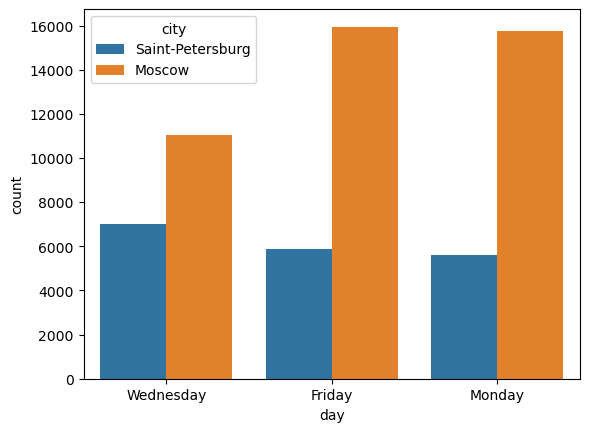

In [17]:
sns.countplot(data=df, x='day', hue='city')
plt.show()

**Выводы**

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Значит, данные говорят в пользу первой гипотезы.

### Музыка в начале и в конце недели

Согласно второй гипотезе, утром в понедельник в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.

Добавим в наши данные новый признак "time_of_day", если наблюдение попадает во временной интервал с 7 до 11 утра, то значение этого признака будет "morning", если с 17 до 23 вечера, то "evening", а иначе "other"

In [18]:
def calculate_time_of_day(value: str) -> str:
    """
    Переводит время суток в категориальную переменную
    """
    if '07:00' < value < '11:00':
        return "morning"
    elif '17:00' < value < '23:00':
        return "evening"
    else:
        return "other"


df['time_of_day'] = df.time.apply(calculate_time_of_day)

Посмотрим на результат

In [19]:
df.sample(10)

,user_id,track,artist,genre,city,time,day,time_of_day
10784,E12AB70C,The Green Leaves Of Summer,Nick Perito,latin,Moscow,21:12:11,Friday,evening
40943,18E100C4,Симфония No. 14 соч. 135: I. Де профундис - Ad...,Марк Решетин Мстислав Ростропович Симфонически...,classical,Saint-Petersburg,20:07:47,Wednesday,evening
47397,71C75FD9,One Track Mind,Mayer Hawthorne,pop,Moscow,14:29:25,Friday,other
40373,2EA3380D,Разные,unknown,rusrap,Moscow,21:04:16,Monday,evening
25753,65E1F522,Eavesdropping,1WayTKT,dance,Saint-Petersburg,14:00:53,Monday,other
46823,35228F32,Дворик,Николай Красковский,russian,Saint-Petersburg,21:23:17,Friday,evening
48097,5F18C57F,Yume Xp,Robin Yerah,rnb,Saint-Petersburg,21:12:49,Monday,evening
9069,32FA8D38,River Down Below,Riverside,rock,Saint-Petersburg,14:42:24,Monday,other
14736,4B28BADE,Comme Les Oiseaux,Ishay Ribo,jewish,Moscow,21:54:36,Wednesday,evening
59059,FE3AB016,Caracalla,River Aria,metal,Moscow,20:01:03,Friday,evening


- разделим данные на понедельник утро и пятницу вечер
- разделим данные на пользователей по городам
- разделим данные по жанру
- посчитаем количество наблюдений для каждой категории

In [20]:
def genre_weekday(df, city, day, time_of_day):
    genre_df = df.query('day == @day and time_of_day == @time_of_day and city == @city')
    return genre_df.groupby('genre').user_id.count().sort_values(ascending=False)

Распределение по жанрам в понедельник утром в Москве

In [21]:
monday_morning_moscow = genre_weekday(df, 'Moscow', 'Monday', 'morning')[:10]
monday_morning_moscow

genre
pop            781
dance          549
electronic     480
rock           474
hiphop         286
ruspop         186
world          181
rusrap         175
alternative    164
unknown        161
Name: user_id, dtype: int64

Распределение по жанрам в понедельник утром в Санкт-Петербурге

In [22]:
monday_morning_spb = genre_weekday(df, 'Saint-Petersburg', 'Monday', 'morning')[:10]
monday_morning_spb

genre
pop            218
dance          182
rock           162
electronic     147
hiphop          80
ruspop          64
alternative     58
rusrap          55
jazz            44
classical       40
Name: user_id, dtype: int64

Распределение по жанрам в пятницу вечером в Москве

In [23]:
friday_evening_moscow = genre_weekday(df, 'Moscow', 'Friday', 'evening')[:10]
friday_evening_moscow

genre
pop            713
rock           517
dance          495
electronic     482
hiphop         273
world          208
ruspop         170
alternative    163
classical      163
rusrap         142
Name: user_id, dtype: int64

Распределение по жанрам в пятницу вечером в Санкт-Петербурге

In [24]:
friday_evening_spb = genre_weekday(df, 'Saint-Petersburg', 'Friday', 'evening')[:10]
friday_evening_spb

genre
pop            256
rock           216
electronic     216
dance          210
hiphop          97
alternative     63
jazz            61
classical       60
rusrap          59
world           54
Name: user_id, dtype: int64

Визуализируем данные

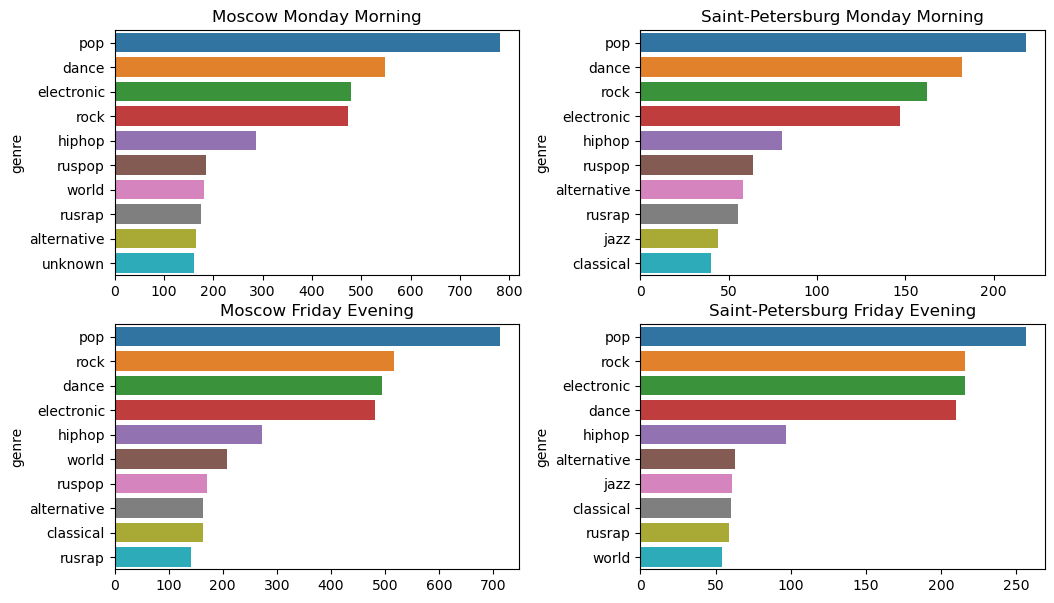

In [25]:
fig, axs = plt.subplots(nrows= 2 , ncols= 2, figsize=(12, 7))
sns.barplot(x=monday_morning_moscow, y=monday_morning_moscow.index, ax=axs[0, 0])
sns.barplot(x=monday_morning_spb, y=monday_morning_spb.index, ax=axs[0, 1])
sns.barplot(x=friday_evening_moscow, y=friday_evening_moscow.index, ax=axs[1, 0])
sns.barplot(x=friday_evening_spb, y=friday_evening_spb.index, ax=axs[1, 1])
axs[0, 0].set_title('Moscow Monday Morning')
axs[0, 1].set_title('Saint-Petersburg Monday Morning')
axs[1, 0].set_title('Moscow Friday Evening')
axs[1, 1].set_title('Saint-Petersburg Friday Evening')
for i in range(2):
    for j in range(2):
        axs[i, j].set_xlabel('')
plt.subplots_adjust(wspace=0.3, hspace=0.2)
plt.show()

**Выводы**

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное различие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

### Жанровые предпочтения в Москве и Петербурге

Гипотеза: Петербург — столица рэпа, музыку этого жанра там слушают чаще, чем в Москве.  А Москва — город контрастов, в котором, тем не менее, преобладает поп-музыка.

Посмотрим распределение по жанрам в Москве и Санкт-Петербурге

Распределение в Москве

In [26]:
moscow_genres = df.query('city == "Moscow"').groupby('genre') \
    .user_id.count().sort_values(ascending=False)[:10]
moscow_genres

genre
pop            5892
dance          4435
rock           3965
electronic     3786
hiphop         2096
classical      1616
world          1432
alternative    1379
ruspop         1372
rusrap         1161
Name: user_id, dtype: int64

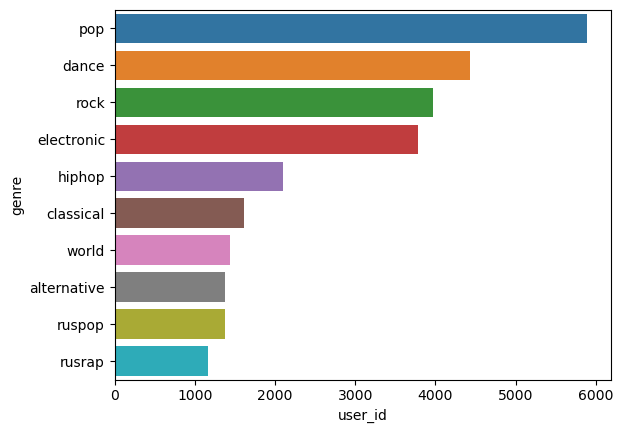

In [27]:
sns.barplot(x=moscow_genres, y=moscow_genres.index)
plt.show()

Распределение по жанрам в Санкт-Петербурге

In [28]:
spb_genres = df.query('city == "Saint-Petersburg"').groupby('genre') \
    .user_id.count().sort_values(ascending=False)[:10]
spb_genres

genre
pop            2431
dance          1932
rock           1879
electronic     1737
hiphop          960
alternative     649
classical       646
rusrap          564
ruspop          538
world           515
Name: user_id, dtype: int64

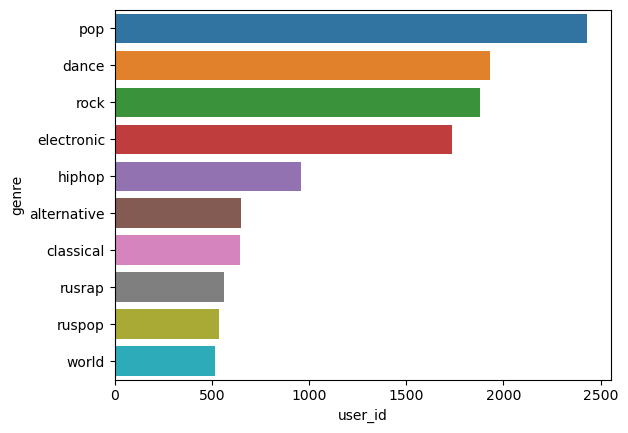

In [29]:
sns.barplot(x=spb_genres, y=spb_genres.index)
plt.show()

**Выводы**

Гипотеза частично подтвердилась:
* Поп-музыка — самый популярный жанр в Москве, как и предполагала гипотеза. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Вопреки ожиданиям, рэп одинаково популярен в Москве и Петербурге.


## Итоги исследования

Мы проверили три гипотезы и установили:

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге.

Первая гипотеза полностью подтвердилась.

2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
* в Москве слушают музыку жанра “world”,
* в Петербурге — джаз и классику.

Таким образом, вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.

3. Во вкусах пользователей Москвы и Петербурга больше общего, чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские.

Третья гипотеза не подтвердилась. Если различия в предпочтениях и существуют, на основной массе пользователей они незаметны.

